# Social Determinants of Health (SDOH) in the United States

### 1. Loading the Dataset
Dataset has been downloaded from the CDC website and saved as a CSV file on Google Drive. The data is loaded into a pandas DataFrame for further analysis.
<br>
 
*SDOH Measures for Place, ACS 2017-2021*
<br>
(CDC URL) https://data.cdc.gov/500-Cities-Places/SDOH-Measures-for-Place-ACS-2017-2021/edkk-ze78/about_data\
<br>
(Google Drive URL) https://drive.google.com/file/d/1a1EWWTNq_AkFrwTeJmr_Dl-V367oPrA8/view?usp=sharing

In [1]:
# import libraries for data loading
import pandas as pd

# google drive location of the file
url = 'https://drive.google.com/file/d/1a1EWWTNq_AkFrwTeJmr_Dl-V367oPrA8/view?usp=sharing'

# extract file id from the url
file_id = url.split('/')[-2]

# create a read path
read_path = 'https://drive.usercontent.google.com/download?id={}&export=download&authuser=0&confirm=t'.format(file_id)

# read the data
df = pd.read_csv(read_path)
df.head()

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,MOE,TotalPopulation,LocationID,CategoryID,MeasureID,DataValueTypeID,Short_Question_Text,Geolocation
0,2017-2021,ID,Idaho,Hauser,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.5,0.7,1015,1635830,SDOH,CROWD,Percent,Crowding,POINT (-117.008 47.7736943)
1,2017-2021,ID,Idaho,Weston,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.0,15.4,341,1687040,SDOH,CROWD,Percent,Crowding,POINT (-111.9777986 42.0362085)
2,2017-2021,IA,Iowa,Buckeye,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.0,33.7,112,1909100,SDOH,CROWD,Percent,Crowding,POINT (-93.3758252 42.4195334)
3,2017-2021,IA,Iowa,Carroll,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.0,0.5,10261,1911080,SDOH,CROWD,Percent,Crowding,POINT (-94.8646395 42.069835)
4,2017-2021,IA,Iowa,Conroy,5-year ACS,SDOH,Crowding among housing units,%,Percentage,0.0,17.0,158,1915870,SDOH,CROWD,Percent,Crowding,POINT (-91.9985284 41.7266134)


### 2. Exploratory Data Analysis
An initial exploration of the dataset is performed to understand its structure and contents. This includes checking the dimensions of the dataset, the data types of the columns, and the first few rows of the data.

In [8]:
# Let's look the SDOH Measures we have available for analysis

# unique values for 'Short_Question_Text' and 'Measure' 
# (show as dataframe for better readability)
# (set the display option to show all columns)
pd.set_option('display.max_colwidth', None)
pd.DataFrame({'Short_Question_Text': df['Short_Question_Text'].unique(), 'Measure': df['Measure'].unique()})

,Short_Question_Text,Measure
0,Crowding,Crowding among housing units
1,Single-parent households,Single-parent households
2,Housing cost burden,Housing cost burden among households
3,Aged 65 years or older,Persons aged 65 years or older
4,No broadband,No broadband internet subscription among households
5,Poverty,Persons living below 150% of the poverty level
6,Racial or ethnic minority status,Persons of racial or ethnic minority status
7,No high school diploma,No high school diploma among adults aged 25 years or older
8,Unemployment,Unemployment among people 16 years and older in the labor force


In [10]:
# For each 'Short_Question_Text', calculate the average 'Data_Value' for each 'StateAbbr'
# 'Short_Question_Text' are rows and 'StateAbbr' are columns
df_pivot = df.pivot_table(index='Short_Question_Text', columns='StateAbbr', values='Data_Value', aggfunc='mean')
df_pivot

StateAbbr,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Short_Question_Text,,,,,,,,,,,,,,,,,,,,,
Aged 65 years or older,13.897842,19.159619,19.172014,25.627725,20.239182,18.256667,20.659242,12.2,22.137975,24.160952,...,19.678652,20.003838,16.932949,15.470405,19.951231,21.837209,19.411201,19.728589,21.976905,19.836628
Crowding,18.482117,1.695321,2.590273,8.216825,6.681176,2.469556,1.167308,3.9,1.902532,3.114407,...,4.355241,1.672727,4.937161,3.301246,2.011556,1.884884,3.435877,1.513733,1.367143,2.786628
Housing cost burden,18.467153,22.043501,21.363823,19.688863,28.773844,25.471778,25.951923,27.4,27.530380,28.877119,...,17.790652,22.503232,21.282285,18.874766,23.063945,29.294767,24.015747,20.926467,20.449286,18.865698
No broadband,28.948175,23.571750,27.628669,28.277962,14.149802,14.604000,9.436538,12.8,9.724051,15.338559,...,24.300283,19.731717,20.962608,12.846417,18.415100,20.131395,11.955844,16.270037,19.816190,17.719767
No high school diploma,12.443165,15.915945,15.479693,16.672275,15.893997,7.777111,6.055924,7.8,9.401266,12.197460,...,11.511798,14.076768,19.574726,7.336760,12.678462,6.839535,9.786526,7.827840,14.758810,7.344767
Poverty,31.911511,29.386135,32.153925,33.720616,22.562682,19.942889,13.834450,21.0,20.256962,24.089936,...,27.990730,28.112929,26.957877,18.779128,22.172573,19.838953,19.168994,18.944320,32.519048,18.662791
Racial or ethnic minority status,59.718345,31.198960,25.957338,50.741469,47.114578,26.093333,20.084834,63.3,33.192405,36.984656,...,22.716573,14.279798,49.315753,15.797196,30.381538,7.641860,26.637987,11.759426,8.392619,14.731977
Single-parent households,6.982117,6.869324,7.401536,6.033886,5.567503,4.910444,5.933654,6.8,6.846835,5.970869,...,7.300567,6.628283,7.234680,4.481931,6.063020,5.798837,5.221266,5.724220,5.170476,3.841279
Unemployment,13.879496,6.599652,6.257118,8.728058,7.686312,4.697550,5.841232,7.1,6.027848,5.586002,...,6.202254,6.410548,5.530997,3.833333,4.774228,4.965116,5.391531,3.839950,8.779036,5.476471


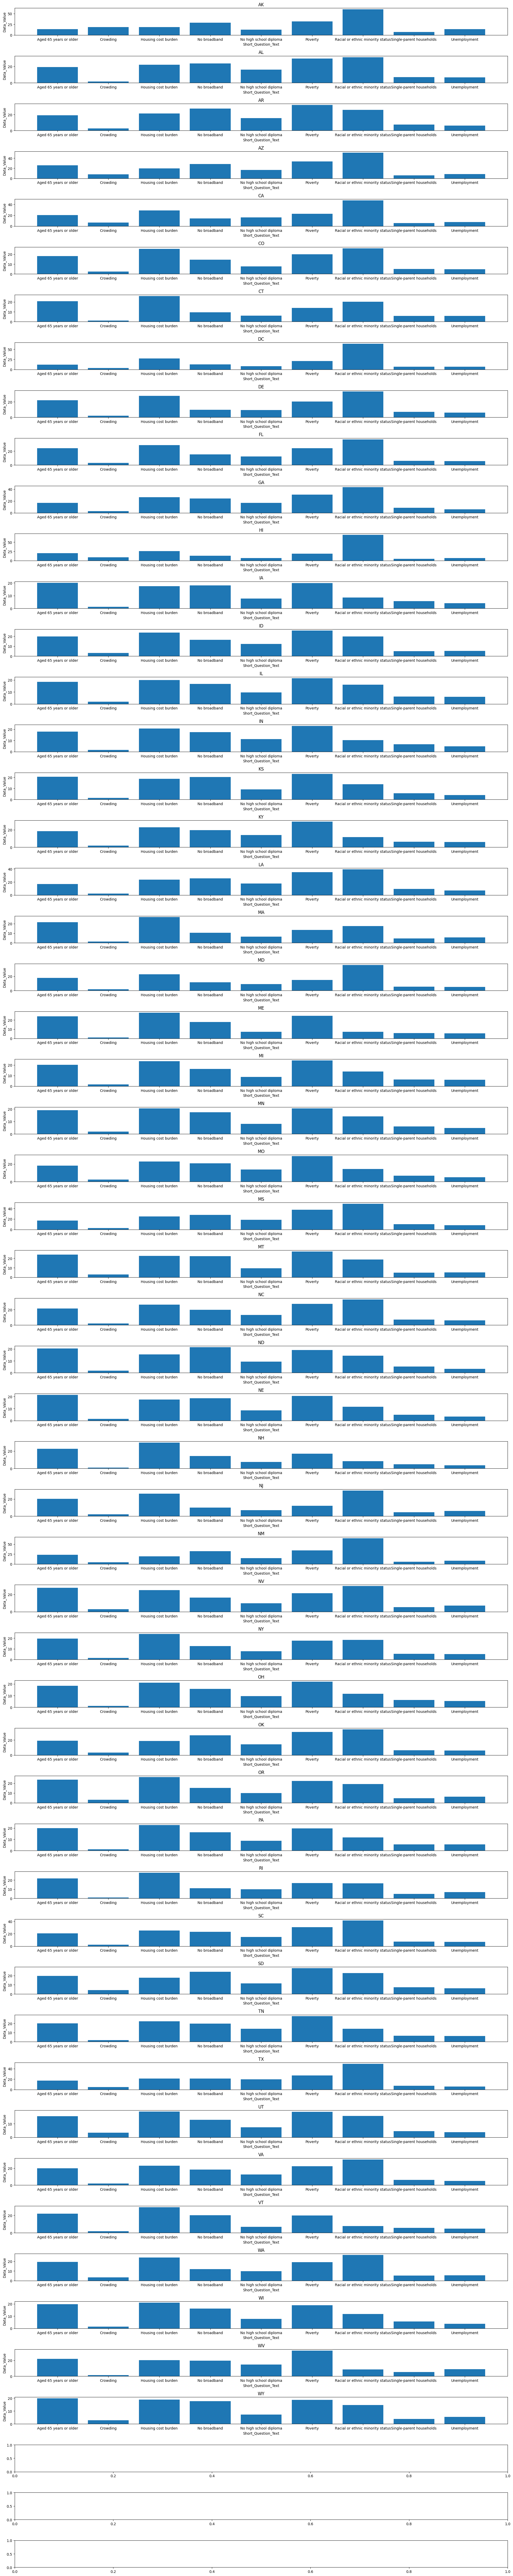

In [11]:
# plot the data

# we have 12 'Short_Question_Text' and 54 'StateAbbr'
# subplot for each 'StateAbbr' and use 'Short_Question_Text' as the x-axis
# set the figure size
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(54, 1, figsize=(10, 100))
fig, ax = plt.subplots(54, 1, figsize=(20, 100))

# iterate over each 'StateAbbr'
for i, state in enumerate(df_pivot.columns):
    ax[i].bar(df_pivot.index, df_pivot[state])
    # ax[i].axhline(df_pivot[state].min(), color='r', linestyle='--')
    # ax[i].axhline(df_pivot[state].median(), color='g', linestyle='--')
    # ax[i].axhline(df_pivot[state].max(), color='b', linestyle='--')
    ax[i].set_title(state)
    ax[i].set_ylabel('Data_Value')
    ax[i].set_xlabel('Short_Question_Text')

plt.tight_layout()
plt.show()